In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2
from keras.models import Sequential
# Keras implementation of convolution
from keras.layers.convolutional import Conv2D
# Activation functions
from keras.layers.core import Activation
# Flattens into a 1D array
from keras.layers.core import Flatten
# Fully connected layer
from keras.layers.core import Dense
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.layers.core import Dropout
from tensorflow.keras.layers import BatchNormalization


train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")
target_names = ["a","b","c","d","e","f","g","h","i","k","l","m","n","o","p",
    "q","r","s","t","u","v","w","x","y"]
target_names = list(target_names)

print(train.head(n=10))
print(train.shape)

labels = train['label'].values
labels_arr = np.array(labels)
print(len(np.unique(labels_arr)))

train.drop('label', axis=1, inplace=True)

images = train.values

images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

labels = LabelBinarizer().fit_transform(labels)
images = images.astype("float")/255.0
images = images.reshape(images.shape[0], 28, 28, 1)


(x_train, x_test, y_train, y_test) = train_test_split(images, labels, test_size = 0.3)

inputShape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# Assume stride to be max pooling size.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# CONV => RELU => CONV => RELU => POOL
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(24))
model.add(Activation("softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=8, verbose=1)
predictions = model.predict(x_test, batch_size=32)
report = classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1), target_names=target_names)
print(report)
model.save("VGG_weights.hdf5")



   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   
5     16     161     168     172     173     178     184     189     193   
6      8     134     134     135     135     136     137     137     138   
7     22     114      42      74      99     104     109     117     127   
8      3     169     174     176     180     183     185     187     188   
9      3     189     189     189     190     190     191     190     190   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


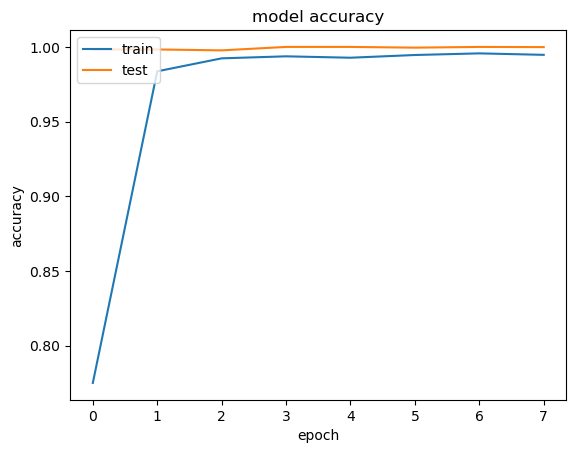

In [2]:
import matplotlib.pyplot as plt
import numpy as np
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

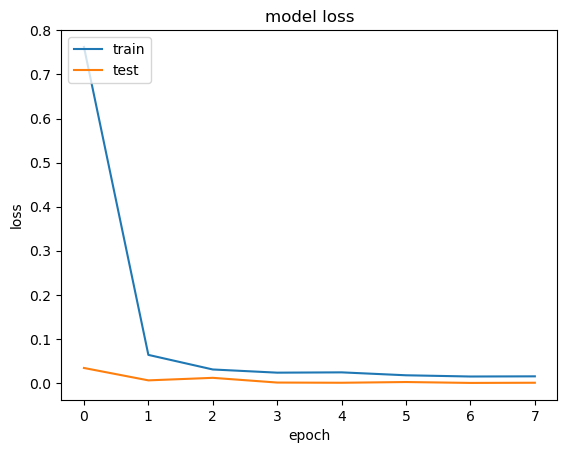

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()